In [2]:
## Generate csv for dataset
import csv  
import os
import pandas as pd

root_folder = "/home/udayanga/ResearchWork/SNN/selected_train_test/RGBSelected/Crack_Masksed_Imgs" #/home/udayanga/DTU_HPC_Cluster_discussion/Ideal_Events_Extracted/"
class_folder = "crack"
destination_csv_file = "/home/udayanga/ResearchWork/SNN/selected_train_test/RGBSelected/Crack_Masksed_Imgs/CrackedMaskImages.csv"
label = 2

count = 0
f = open(destination_csv_file, 'a')
with open(destination_csv_file, 'a', encoding='UTF8') as f:
    writer = csv.writer(f)
    for file in os.listdir(os.path.join(root_folder,class_folder)):
        relative_path_name = class_folder + "/" + file
        data = [relative_path_name,label]
        writer.writerow(data)
        count += 1
print(f'{count} files written for {class_folder} with label {label}')
results = pd.read_csv(destination_csv_file)
print(f'file size is {len(results)}')
f.close()

258 files written for crack with label 2
file size is 257


In [57]:
def getMaskFileLocation(file):
    parent_folder = "/home/udayanga/ResearchWork/SNN/selected_train_test/ClassificationSetNew_old_Full/"
    sub_folder = "crack_masks"
    mas_f_name = "mask_" + file
    
    print("file is ",file)
    des_file = [filename for filename in os.listdir(os.path.join(parent_folder,sub_folder)) if filename.startswith(mas_f_name)]
    if len(des_file) > 0:
        fullFname = os.path.join(parent_folder,sub_folder,des_file[0])
        #print("full path name is ",fullFname)
        if os.path.isfile(fullFname):
            relative_path_name = sub_folder + "/" + des_file[0]
            #print("returning ",relative_path_name)
            return relative_path_name
        else:
            return None
    else:
        return None

In [ ]:
import csv  
import os
import pandas as pd

root_folder = "/home/udayanga/ResearchWork/SNN/selected_train_test/ClassificationSetNew_old_Full/train/"
class_folder = "corrosion"
destination_csv_file = "/home/udayanga/ResearchWork/SNN/selected_train_test/ClassificationSetNew_old_Full/train/damageClassesTrainImgData.csv"
label = 3

count = 0
f = open(destination_csv_file, 'a')
with open(destination_csv_file, 'a', encoding='UTF8') as f:
    writer = csv.writer(f)
    for file in os.listdir(os.path.join(root_folder,class_folder)):
        relative_path_name = class_folder + "/" + file
        data = [relative_path_name,label,"None"]
        if class_folder == "crack":
            fn = file.rsplit('.', 1)[0]
            mask_file_path = getMaskFileLocation(fn)
            if mask_file_path != None:
                data = [relative_path_name,label,mask_file_path]
        print("data is ",data)
        writer.writerow(data)
        count += 1
print(f'{count} files written for {class_folder} with label {label}')
results = pd.read_csv(destination_csv_file)
print(f'file size is {len(results)}')
f.close()

: 

In [ ]:
results.tail


In [ ]:
import csv  
import os
import pandas as pd
destination_csv_file = "/home/udayanga/ResearchWork/SNN/selected_train_test/ClassificationSetNew_old_Full/test/damageClassesTestEventData.csv"
results = pd.read_csv(destination_csv_file)
data_col = []
for i in range(len(results)):
    data_col.append('0')

results[:,2] = data_col

results.to_csv('/home/udayanga/ResearchWork/SNN/selected_train_test/ClassificationSetNew_old_Full/test/kkk.csv')                              # Export new pandas DataFrame

In [1]:
#Augment and save basic event data
def augmentAndSaveEvents(src_folder_path,basicEventFile,destPath,flipType):

    v2e_data = h5py.File(os.path.join(src_folder_path,basicEventFile), "r")
    events = v2e_data["events"][()]
    events_desired = events[events[:,0] < 50000]
    events_temp = events_desired
    prefix = "hor_aug_"
    if flipType == 0: # then horizontal flip
        events_temp = events_desired
        events_temp[:,1] = 345 - events_temp[:,1]
    elif flipType == 1:
        prefix = "ver_aug_"
        events_temp = events_desired
        events_temp[:,2] = 259 - events_temp[:,2]
    
    ouputFileName = prefix + basicEventFile
    path = os.path.join(destPath, ouputFileName)
    dvs_h5 = h5py.File(path, "w")

    dvs_h5_dataset = dvs_h5.create_dataset(
                    name="events",
                    shape=(0, 4),
                    maxshape=(None, 4),
                    dtype="uint32",
                    compression="gzip")
    dvs_h5_dataset.resize(
                    dvs_h5_dataset.shape[0] + events_temp.shape[0],
                    axis=0)

    dvs_h5_dataset[-events_temp.shape[0]:] = events_temp

In [2]:
import cv2

def augmentAndSaveImage(src_folder_path,file,dest_path,flipType):
    src = cv2.imread(os.path.join(src_folder_path,file))
    if flipType == 0:
        image = cv2.flip(src, 1)
        fname = "hor_aug_" + file
        fullName = os.path.join(dest_path,fname)
        cv2.imwrite(fullName,image)
    
    if flipType == 1:
        image = cv2.flip(src, 0)
        fname = "ver_aug_" + file
        fullName = os.path.join(dest_path,fname)
        cv2.imwrite(fullName,image)


In [16]:
dest_path = "/home/udayanga/ResearchWork/SNN/selected_train_test/RGBSel_Augmented/healthy"
src_path = "/home/udayanga/ResearchWork/SNN/selected_train_test/RGBSelected/train/healthy"
flip_type = 0
count = 0
for file_name in os.listdir(src_path): 
    augmentAndSaveImage(src_path,file_name,dest_path,flip_type)
    count += 1

In [2]:
import h5py
import shutil

In [3]:
def load_v2e_event_data(filename):
    """Load V2E Events, all HDF5 records."""

    assert os.path.isfile(filename)

    v2e_data = h5py.File(filename, "r")
    events = v2e_data["events"][()]
    events_1 = events[events[:,0] < 50000]

    return events_1

In [13]:
#Remove files with Empty events
base_src_folder = "/home/udayanga/ResearchWork/SNN/selected_train_test/ClassificationSetNew_old_Full/test/efflorescence/"
base_dest_folder = "/home/udayanga/ResearchWork/SNN/selected_train_test/ClassificationSetNew_old_Full/empty_test_events/empty_efflorescence/"

for file in os.listdir(base_src_folder):
    full_name = base_src_folder + "/" + file
    events = load_v2e_event_data(full_name)
    if(events.size == 0):
        print("Empty sample ....",full_name, "for class")
        shutil.move(full_name,base_dest_folder)

In [21]:
import shutil

In [31]:

#Copying ideal events 
src_root_event_path = "/home/udayanga/ResearchWork/SNN/Synthesized_event_dataSets_2/Customized_for_event_gen/Event_Data_Collector/Only_events/spalling_multi/"
check_desired_name_here = "/home/udayanga/ResearchWork/SNN/selected_train_test/ClassificationSetNew_old_Full/test/spalling/"
check_desired_name_here_list = os.listdir(check_desired_name_here)
dest_path = "/home/udayanga/ResearchWork/SNN/selected_train_test/ClassificationSet_old_Full_Dark/test/spalling/"

for folder_1 in os.listdir(src_root_event_path): #corrosion_0
    print(folder_1)
    if os.path.isdir(os.path.join(src_root_event_path,folder_1)):
        for folder_2 in os.listdir(os.path.join(src_root_event_path,folder_1)): #dark
            print(folder_2)
            if folder_2 != "_dark":
                continue
        for fname in os.listdir(os.path.join(src_root_event_path,folder_1,folder_2)):
            print(fname)
            if os.path.isfile(os.path.join(src_root_event_path,folder_1,folder_2,fname)):
                print("it's a file ....")
                if fname in check_desired_name_here_list:
                    shutil.move(os.path.join(src_root_event_path,folder_1,folder_2,fname),dest_path)
                    print("moving ...")

 
    

    


spalling_multi_101
_bright
_dark
_ideal
WA-9217C-091516-FLD-DC-VIC-004-AA1-1_5jpffesy.si3.h5
it's a file ....
spalling_multi_272
_bright
_dark
_ideal
WP_20140603_039_wr3sdsjl.rrw.h5
it's a file ....
spalling_multi_109
_bright
_dark
_ideal
045_es4rvpxo.2fi.h5
it's a file ....
spalling_multi_271
_bright
_dark
_ideal
OR-07562A-08222016-FLD-DC-VIC-004-GB112-1_t2rx3jdr.plq.h5
it's a file ....
spalling_multi_379
_bright
_dark
_ideal
RIMG5088_taogjgv3.puo.h5
it's a file ....
spalling_multi_16
_bright
_dark
_ideal
DSCF3857_pf5q1bvz.wek.h5
it's a file ....
spalling_multi_45
_bright
_dark
_ideal
AZ-1842_2.h5
it's a file ....
spalling_multi_163
_bright
_dark
_ideal
IMG_0310_ywa3cb3d.40t.h5
it's a file ....
spalling_multi_290
_bright
_dark
_ideal
RIMG4003_0cxklwzn.k3u.h5
it's a file ....
spalling_multi_88
_bright
_dark
_ideal
IMG_0086_i3tnsdoc.j2e.h5
it's a file ....
spalling_multi_59
_bright
_dark
_ideal
RIMG2021_qiuimi0r.fjc.h5
it's a file ....
spalling_multi_56
_bright
_dark
_ideal
IMG_2286_fjb

In [ ]:
import json

with open('messages.json') as user_file:
  file_contents = user_file.read()
  
for item in file_contents:
    print(item)

In [3]:
count = 0
train_acc_list = []
val_acc_list = []
with open('messages_last_t_predict_classi.json', 'r') as handle:
    json_data = [json.loads(line) for line in handle]
    for item in json_data:
        if item['type'] == "metric_msg":
            if item['payload']['metric']['metricName'] == "train_loss_epoch":
                epoch = item['payload']['metric']['epoch']
                train_acc_val = item['payload']['metric']['metricValue']
                train_acc_list.append(train_acc_val)
            if item['payload']['metric']['metricName'] == "val_loss":
                epoch = item['payload']['metric']['epoch']
                val_acc_val = item['payload']['metric']['metricValue']
                val_acc_list.append(val_acc_val)


FileNotFoundError: [Errno 2] No such file or directory: 'messages_last_t_predict_classi.json'

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
##For 83 % test acc #with 93% train acc

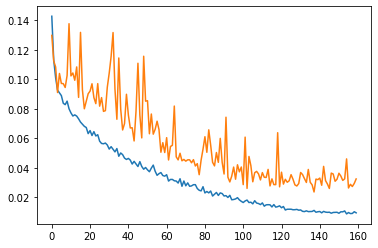

In [66]:
plt.plot(train_acc_list)  #vgg13 - 2 conv layers 
plt.plot(val_acc_list)

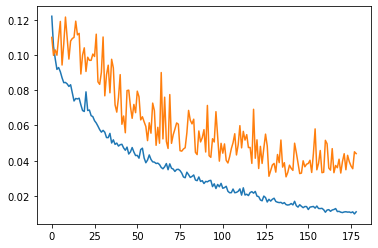

In [70]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)

In [56]:
# With 80% test accuracy #91 train acc  #vgg-7 features

In [ ]:
#vgg-11 features 93% train 79% test acc

In [2]:
import torch

In [62]:
torch.zeros(2,3).shape[0]

2

In [4]:
ss = torch.rand(8,5,4)
ss.shape

torch.Size([8, 5, 4])

In [6]:
ss[:,4,:].shape

torch.Size([8, 4])

: 

In [1]:
import torch
aaa = torch.rand(8,4)
torch.argmax(aaa,dim=1)

tensor([0, 2, 2, 0, 0, 2, 0, 2])

: 